本项目提供了两份数据：train.csv文件作为训练构建与生存相关的模型；另一份test.csv文件则用于测试集，用我们构建出来的模型预测生存情况；

PassengerId --Id,具有唯一标识的作用，即每个人对应一个Id
survived --是否幸存 1表示是 0表示否
pclass --船舱等级 1:一等舱 2:二等舱 3:三等舱
Name --姓名，通常西方人的姓名
Sex --性别，female女性 male 男性
Age --年龄
SibSp --同船配偶以及兄弟姐妹的人数
Parch --同船父母或子女的人数
Ticket --船票
Fare --票价
Cabin --舱位
Embarked --登船港口

In [1]:
#读取数据
import pandas as pd
df_train,df_test = pd.read_csv('train.csv'),pd.read_csv('test.csv')

从训练集开始

In [2]:
#查看前五行数据
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#查看后5行数据
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
#查看数据信息，其中包含数据纬度、数据类型、所占空间等信息
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


数据纬度：891行 X 12列
缺失字段：Age，Cabin，Embarked
数据类型：两个64位浮点型，5个64位整型，5个python对象


In [5]:
#描述性统计
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1.除了python对象之外的数据类型，均参与了计算
2.38.4%的人幸存，死亡率很高
3.年龄现有数据714，缺失占比714/891 = 20%
4.同船兄弟姐妹与配偶人数最大为8，同船父母或子女最大数则为6，看来有大家庭小家庭之分；
5.票价最小为0，最大为512.3，均值为32.20，中位数为14.45，正偏，贫富差距不小；

In [6]:
#那么python对象对应的数据查看
df_train[['Name','Sex','Ticket','Cabin','Embarked']].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Heikkinen, Miss. Laina",male,347082,B96 B98,S
freq,1,577,7,4,644


# 特征分析

In [7]:
# 1.PassengerId，id仅仅是来标识乘客的唯一性，必然与幸存无关

In [8]:
# 2.Pclass
#船舱等级，一等级是整个船最昂贵奢华的地方，有钱人才能享受，有没有可能一等舱有钱人比三等舱的穷人更容易幸存呢？

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#生成pclass-survive的列联表
Pclass_Survived = pd.crosstab(df_train['Pclass'],df_train['Survived'])

In [10]:
Pclass_Survived

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [11]:
Pclass_Survived.count()

Survived
0    3
1    3
dtype: int64

In [12]:
Pclass_Survived.index

Int64Index([1, 2, 3], dtype='int64', name='Pclass')

2
[0 1 2]


Text(0.5,1,'Survived status by pclass')

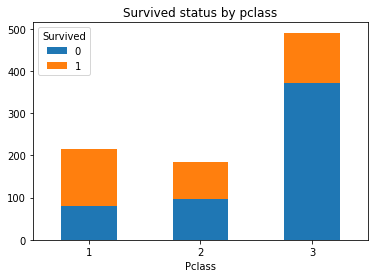

In [13]:
#绘制堆积柱形图
Pclass_Survived.plot(kind = 'bar',stacked = True)
Survived_len = len(Pclass_Survived.count())
print(Survived_len)
Pclass_index = np.arange(len(Pclass_Survived.index))
print(Pclass_index)

plt.xticks(Pclass_Survived.index-1,Pclass_Survived.index,rotation = 360)
plt.title('Survived status by pclass')

其中列联表就等于一下操作

In [14]:

#生成Survived为0时，每个Pclass的总计数
Pclass_Survived_0 = df_train.Pclass[df_train['Survived'] == 0].value_counts()
#生成Survived为1时，每个Pclass的总计数
Pclass_Survived_1 = df_train.Pclass[df_train['Survived'] == 1].value_counts()
#将两个状况合并为一个dataFram
Pclass_Survived = pd.DataFrame({0:Pclass_Survived_0,1:Pclass_Survived_1})
Pclass_Survived

,0,1
1,80,136
2,97,87
3,372,119


In [15]:
#Name
#姓名，总数为891个且有891种不同的结果，没多大意义，但值得注意的是性命中有头衔存在的，头衔是身份地位的象征，是否身份地位越高更容易生存？
#首先提取出头衔
import re
df_train['Appellation'] = df_train.Name.apply(lambda x : re.search('\w+\.',x).group()).str.replace('.','')
#查看多钟不同的结果
df_train.Appellation.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

#头衔解读：Mr既可用于已婚男性，也可用于未婚男性；Mrs已婚女性；Miss通常用来称呼未婚女性，但有时也用于称呼自己不了解的年龄较大的妇女；
#Master： 男童或男婴；Don：大学教师；Rev： 牧师；Dr：医生或博士；Mme：女士；Ms：既可用于已婚女性也可用于未婚女性；Major：陆军少校；
#Lady ： 公侯伯爵的女儿；Sir：常用来称呼上级长官；Mlle：小姐；Col：上校；Capt：船长；Countess：伯爵夫人；Jonkheer：乡绅；

In [16]:
#性别与头衔的对应的人数
Appellation_Sex = pd.crosstab(df_train.Appellation,df_train.Sex)
Appellation_Sex.T

Appellation,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [17]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Appellation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [18]:
#将少数部分用Rare表示，将‘Mlle’，‘Ms’用‘MIss’代替，将‘Mme’用‘Mrs’代替
df_train['Appellation'] = df_train['Appellation'].replace(['Capt','Col','Countess','Don',
                                                           'Dr','Jonkheer','Lady','Major','Rev','Sir'],'Rare')
df_train['Appellation'] = df_train['Appellation'].replace(['Mlle','Ms'],'Miss')
df_train['Appellation'] = df_train['Appellation'].replace('Mme','Mrs')
df_train.Appellation.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

[0 1 2 3]


Text(0.5,1,'Survived status by Appelation')

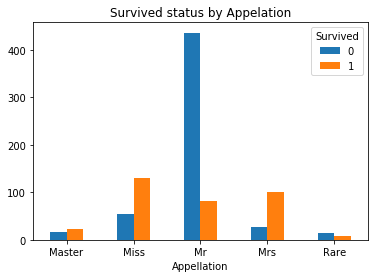

In [19]:
#头衔和幸存者相关吗？
#绘制柱状图
Appellation_Survived = pd.crosstab(df_train['Appellation'],df_train['Survived'])
Appellation_Survived.plot(kind = 'bar')
print(np.arange(len(Appellation_Survived.index)-1))
plt.xticks(np.arange(len(Appellation_Survived.index)),Appellation_Survived.index,rotation = 360)
plt.title('Survived status by Appelation')

# Sex

In [20]:
#性别，女士优先，但这种紧急关头，会让女士先上救生艇吗

In [21]:
#生成列联表
Sex_Survived = pd.crosstab(df_train['Sex'],df_train['Survived'])
Survived_len = len(Sex_Survived.count())
print(Survived_len)
Sex_index = np.arange(len(Sex_Survived.index))
print(Sex_survived.index)
print(Sex_index)
single_width = 0.35

for i in range(Survived_len):
    SurvivedName = Sex_Survived.columns[i]
    print(SurvivedName)
    SexCount = Sex_Survived[SurvivedName]
    print(SexCount)
    SexLocation = Sex_index * 1.05 + (i - 1/2)*single_width
    print(SexLocation)
    
    #绘制柱状图
    plt.bar(SexLocation,SexCount,width = single_width)
    for x,y in zip(SexLocation,SexCount):
        #添加数据标签
        plt.text(x,y,'%.0f'%y,ha = 'center',va= 'bottom')
index = Sex_index * 1.05
plt.xticks(index,Sex_Survived.index,rotation = 360)
plt.title('Survived status by sex')
    

2


NameError: name 'Sex_survived' is not defined

In [ ]:
#结果可以看出，女性的幸存率远高于男性

# Age

In [22]:
#由于Age特征存在缺失值，处理完缺失值，再对其进行分析


# SibSp --同船配偶以及兄弟姐妹的人数

In [23]:
#从之前的描述性统计了解到，兄弟姐妹与配偶的人数最多的为8，最少为0，哪个更容易生存呢？


Text(0.5,1,'Survived status by SibSp')

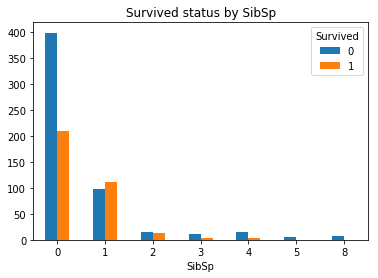

In [24]:
#生成列联表
SibSp_Survived = pd.crosstab(df_train['SibSp'],df_train['Survived'])
#print(SibSp_Survived)
#print(np.arange(len(SibSp_Survived.index)))
SibSp_Survived.plot(kind = 'bar')
plt.xticks(np.arange(len(SibSp_Survived.index)),SibSp_Survived.index,rotation = 360)
plt.title('Survived status by SibSp')


# Parch --同船父母或子女的人数

Text(0.5,1,'Survived status by Parch')

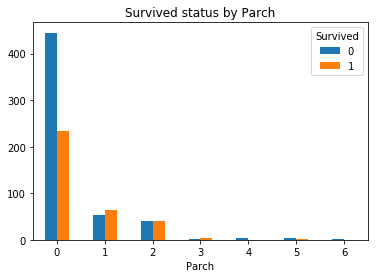

In [25]:
#通过上面的描述性统计了解到，同样也可以分为大家庭，小家庭

Parch_Survived = pd.crosstab(df_train['Parch'],df_train['Survived'])
Parch_Survived.plot(kind = 'bar')
plt.xticks(np.arange(len(Parch_Survived.index)),Parch_Survived.index,rotation = 360)
plt.title('Survived status by Parch')

Text(0.5,1,'Survived status by Parch')

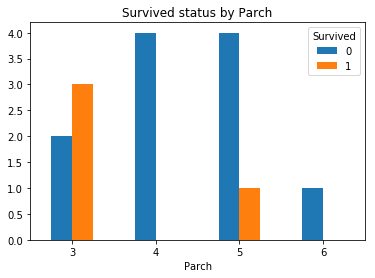

In [26]:
Parch_Survived = pd.crosstab(df_train[df_train.Parch >= 3]['Parch'],df_train['Survived'])
Parch_Survived.plot(kind = 'bar')
plt.xticks(np.arange(len(Parch_Survived.index)),Parch_Survived.index,rotation = 360)
plt.title('Survived status by Parch')

In [27]:
##可以看到，大部分Parch为0，幸存率不大，当为1，2，3时，有所增加，再往上又有所减小

# Ticket --船票

In [28]:
#总人数891，船票有681种，说明部分人共用一张票，什么人能共用一张票呢？需要对他们进行归类，共用票的归位一类，独自使用的归位一类；

Text(0.5,1,'Survived status by GroupTicket')

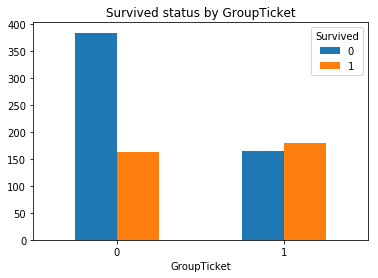

In [29]:
#计算每张船票的使用的人数
Ticket_Count = df_train.groupby('Ticket',as_index = False)['PassengerId'].count()
#获取使用人数为1的船票
Ticket_Count_0 = Ticket_Count[Ticket_Count.PassengerId == 1]['Ticket']
#当船票在已经筛选出使用人数为1的船票中时，将0赋值给GroupTicket，否则将1赋值给GroupTicket
df_train['GroupTicket'] = np.where(df_train.Ticket.isin(Ticket_Count_0),0,1)
#绘制柱形图
GroupTicket_Survived = pd.crosstab(df_train['GroupTicket'],df_train['Survived'])
GroupTicket_Survived.plot(kind = 'bar')
plt.xticks(GroupTicket_Survived.index,rotation = 360)
plt.title('Survived status by GroupTicket')


In [30]:
#很明显，船上有同伴比孤身一人幸存机会大

# Fare --票价

Text(0.5,1,'Survived status by GroupFare(Fare > 120)')

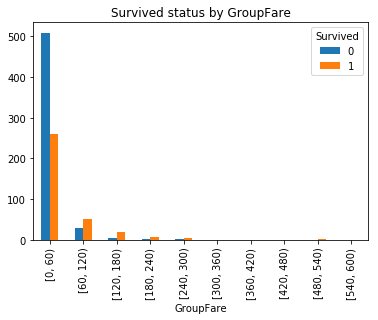

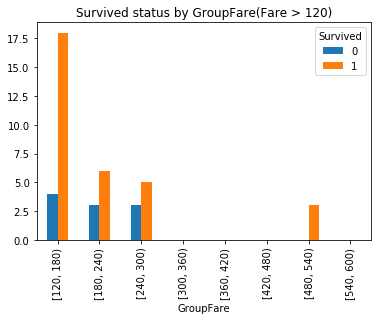

In [31]:
#对Fare进行分组，2**10>891 分成10组，组距为（最大值-最小值）/10取值60
bins = [0,60,120,180,240,300,360,420,480,540,600]
df_train['GroupFare'] = pd.cut(df_train.Fare,bins,right = False)
GroupFare_Survived = pd.crosstab(df_train['GroupFare'],df_train['Survived'])
GroupFare_Survived
GroupFare_Survived.plot(kind = 'bar')
plt.title('Survived status by GroupFare')

GroupFare_Survived.iloc[2:].plot(kind = 'bar')
plt.title('Survived status by GroupFare(Fare > 120)')

In [32]:
#可以看到随着票价的增长，幸存机会也会变大

# Cabin --舱位   #Embarked --登船港口


In [33]:
#由于含有大量缺失值，处理完缺失值再对其进行分析

# 四.特征工程


缺失值主要是由人为原因和机械原因造成的数据缺失，在pandas中用NaN或者NaT表示，它的处理方式有多种：
1.用某些集中趋势度量（平均数，众数）进行对缺失值进行填充；
2.用统计模型来预测缺失值，比如回归模型、决策树、随即森林；
3.删除缺失值；
4.保留缺失值；


In [34]:
#在处理缺失值之前，应当将数据拷贝一份，以保证原始数据的完整性；
train = df_train.copy()

1.Embarked缺失值处理
通过以上，我们已经知道Embarked字段中缺失2个，且数据中S最多，达到644，占比644/891=72%，那么就采用众数进行填充；

In [35]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0]) 
# 0 or index :获取列的众数；1 or columns ：获取行的众数

2.Cabin缺失值处理
Cabin缺失值687个，占比687/891=77%，缺失数据太多，是否删除呢？舱位缺失可能代表这些人没有舱位，不妨用‘NO’来填充；

In [36]:
train['Cabin'] = train['Cabin'].fillna('NO')

3.Age缺失值处理
Age缺失177个，占比177/891=20%，缺失数据也不少，而且Age在本次分析中也尤其重要，孩子和老人属于弱势群体，应当更容易获救，不能删除也不能保留；
采用头衔相对应的年龄中位数进行填充

In [37]:
#求出每个头衔对应的年龄的中位数
train['Age'] = df_train['Age']
Age_Appellation_median = train.groupby('Appellation')['Age'].median()
#在当前表设置Appellation为索引
train.set_index('Appellation',inplace = True)
#在当前表填充缺失值
train.Age.fillna(Age_Appellation_median,inplace = True)
#重置索引
train.reset_index(inplace = True)


#检查一下是否有缺失值

In [38]:
#第一种方法：返回0即表示没有缺失值
train.Age.isnull().sum()

0

In [39]:
#第二种方法：返回False即表示没有缺失值
train.Age.isnull().any()

False

In [40]:
#第三种方法：描述性统计
train.Age.describe()

count    891.000000
mean      29.392447
std       13.268389
min        0.420000
25%       21.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

# 对缺失特征分析

Embarked --登船港口

Text(0.5,1,'Survived status by Embarked')

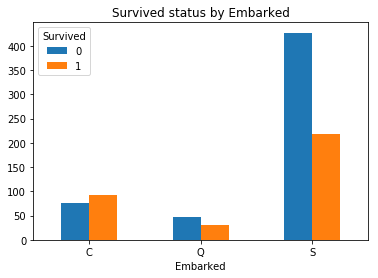

In [41]:
#绘制柱状图
Embarked_Survived = pd.crosstab(train['Embarked'],train['Survived'])
Embarked_Survived.plot(kind = 'bar')
plt.xticks(np.arange(len(Embarked_Survived.index)),Embarked_Survived.index,rotation = 360)
plt.title('Survived status by Embarked')

In [42]:
#C港生存几率会明显高于Q，S港

#Cabin

Text(0.5,1,'Survived ststus by GroupCabin')

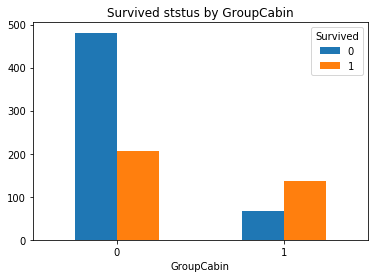

In [43]:
#将没有舱位的归为0，有舱位的归位1
train['GroupCabin'] = np.where(train.Cabin == 'NO',0,1)
#绘制柱状图
GroupCabin_Survived = pd.crosstab(train['GroupCabin'],train['Survived'])
GroupCabin_Survived.plot(kind = 'bar')
plt.xticks(np.arange(len(GroupCabin_Survived.index)),GroupCabin_Survived.index,rotation = 360)
plt.title('Survived ststus by GroupCabin')

In [44]:
#有舱位比没有舱位的生存几率大

Age

Text(0.5,1,'Survived status by GroupAge')

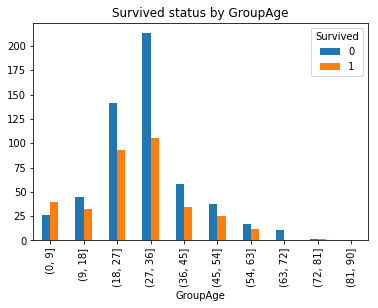

In [45]:
#对Age进行分组
bins = [0,9,18,27,36,45,54,63,72,81,90]
train['GroupAge'] = pd.cut(train.Age,bins)
GroupAge_Survived = pd.crosstab(train['GroupAge'],train['Survived'])
#绘制柱状图
GroupAge_Survived.plot(kind = 'bar')
plt.xticks(np.arange(len(GroupAge_Survived.index)),GroupAge_Survived.index,rotation = 90)
plt.title('Survived status by GroupAge')

In [46]:
#如图，孩子的幸存几率很大

# 新特征提取

In [47]:
#通过以上的分析，已经了解到生存率相关的特性
#1.pclas中没有更多信息可供提取，且为定量变量，这里不作处理；
#2.Appellation是定性变量，将其转化为定量变量

In [48]:
train['Appellation'] = train.Appellation.map({'Mr':0,'Mrs':1,'Miss':1,'Master':3,'Rare':4})
train.Appellation.unique()

array([0, 1, 3, 4])

In [49]:
#3.Sex是定性变量，将其转化成定量变量，即用0表示female，1表示male

In [50]:
train['Sex'] = df_train['Sex']
train['Sex'] = train['Sex'].map({'female':0,'male':1})
train.Sex.unique()

array([1, 0])

In [51]:
4#按照GroupAge特征的范围将Age分为10组

4

In [52]:

train.loc[train['Age'] < 9,'Age'] = 0
train.loc[(train['Age'] >= 9) & (train['Age'] < 18),'Age'] = 1
train.loc[(train['Age'] >= 18) & (train['Age'] < 27),'Age'] = 2
train.loc[(train['Age'] >=27) & (train['Age'] < 36),'Age'] = 3
train.loc[(train['Age'] >= 36) & (train['Age'] < 45),'Age'] = 4
train.loc[(train['Age'] >= 45) & (train['Age'] < 54),'Age'] = 5
train.loc[(train['Age'] >= 54) & (train['Age'] < 63),'Age'] = 6
train.loc[(train['Age'] >= 63) & (train['Age'] < 72),'Age'] = 7
train.loc[(train['Age'] >= 72) & (train['Age'] < 81),'Age'] = 8
train.loc[(train['Age'] >= 81) & (train['Age'] < 90),'Age'] = 9
train.Age.unique()

array([2., 4., 3., 6., 0., 1., 7., 5., 8.])

In [53]:
5.#将SibSp和Parch这两个特征组合成FamilyNumber特征


5.0

In [54]:
#当SibSp和Parch都为0时，则说明是独自1人乘船
train['FamilyNumber'] = train['SibSp'] + train['Parch'] + 1  #+1是因为1个人乘船，家属为0
train.FamilyNumber.unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [55]:
#6 GroupTicket是定量变量，不作处理


In [56]:
# 7. 按照GroupFare特征的范围将Fare分成10组；

In [57]:
train.loc[train['Fare'] < 60,'Fare'] = 0
train.loc[(train['Fare'] >= 60) & (train['Fare'] < 120),'Fare'] = 1
train.loc[(train['Fare'] >= 120) & (train['Fare'] < 180),'Fare'] = 2
train.loc[(train['Fare'] >= 180) & (train['Fare'] < 240),'Fare'] = 3
train.loc[(train['Fare'] >= 240) & (train['Fare'] < 300),'Fare'] = 4
train.loc[(train['Fare'] >= 300) & (train['Fare'] < 360),'Fare'] = 5
train.loc[(train['Fare'] >= 360) & (train['Fare'] < 420),'Fare'] = 6
train.loc[(train['Fare'] >= 420) & (train['Fare'] < 480),'Fare'] = 7
train.loc[(train['Fare'] >= 480) & (train['Fare'] < 540),'Fare'] = 8
train.loc[(train['Fare'] >= 540) & (train['Fare'] < 600),'Fare'] = 9
train.Fare.unique()

array([0., 1., 4., 2., 8., 3.])

In [58]:
#GroupCabin 是定量变量，不作处理
#Embarked是定类变量，转化为定量变量

In [59]:
train['Embarked'] = train.Embarked.map({'S':0,'C':1,'Q':2})
train.Embarked.unique()

array([0, 1, 2])

In [60]:
#现有特征
train.columns

Index(['Appellation', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked',
       'GroupTicket', 'GroupFare', 'GroupCabin', 'GroupAge', 'FamilyNumber'],
      dtype='object')

In [61]:
#删除重复多余的以及与Survived不相关的

In [62]:
train.drop(['PassengerId','Name','SibSp','Parch','Ticket','GroupFare','Cabin','GroupAge'],axis = 1,inplace = True)

In [63]:
#删除后现有特征
train.columns

Index(['Appellation', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'GroupTicket', 'GroupCabin', 'FamilyNumber'],
      dtype='object')

In [64]:
train.head()

,Appellation,Survived,Pclass,Sex,Age,Fare,Embarked,GroupTicket,GroupCabin,FamilyNumber
0,0,0,3,1,2.0,0.0,0,0,0,2
1,1,1,1,0,4.0,1.0,1,0,1,2
2,1,1,3,0,2.0,0.0,0,0,0,1
3,1,1,1,0,3.0,0.0,0,1,1,2
4,0,0,3,1,3.0,0.0,0,0,0,1


# 构建模型

# 逻辑回归

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [77]:
X = train[['Appellation','Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'GroupTicket', 'GroupCabin',  'FamilyNumber']]
Y = train['Survived']
#随机划分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)
#逻辑回归模型初始化
lg = LogisticRegression()
#训练逻辑回归模型
lg.fit(X_train,y_train)
#用测试数据检验模型
lg.score(X_test,y_test)

0.8100558659217877

# 决策树

In [80]:
#尝试使用决策树
from sklearn.tree import DecisionTreeClassifier

In [81]:
#设置书的深度15，内部节点再划分所需要最小样本数2，叶节点最小样本数1，最大叶子节点10，每次分类的最大特征数6
dt = DecisionTreeClassifier(max_depth=15,min_samples_split = 2,min_samples_leaf = 1,max_leaf_nodes = 10,max_features = 6)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.8268156424581006

# KNN

In [82]:
from sklearn import neighbors
from sklearn import cross_validation
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
scores = cross_validation.cross_val_score(knn,X_train,y_train,cv=3)
print(scores.mean())

0.7822749352905719


# 随机森林

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation

RF = RandomForestClassifier(n_estimators=100, min_samples_split=4)
# 计算交叉验证的准确率
scores = cross_validation.cross_val_score(RF, X_train, y_train, cv=3)
print(scores.mean())

0.8103806923613327


# Adaboost

In [86]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(RF,n_estimators=20)
# 计算交叉验证的准确率
scores = cross_validation.cross_val_score(bagging_clf, X_train, y_train, cv=3)
print(scores.mean())

0.8033719817040742


# Stacking

In [87]:
from sklearn.ensemble import VotingClassifier

In [88]:
sclf = VotingClassifier([('lg',lg),('RF',RF),('bagging_clf',bagging_clf),('knn',knn),('dtree',dt)])
# 计算交叉验证的准确率
scores = cross_validation.cross_val_score(sclf, X_train, y_train, cv=3)
print(scores.mean())

/Users/Camus/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Camus/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8202437092980652


/Users/Camus/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
